In [1]:
! pip install nltk
! pip install keras
! pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 7.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=12e840c03e086ad061aab798451b0a44f87e288b4ae9cb91647fb8a70c1278ca
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Importing the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

In [4]:
#Loading the dataset
df = pd.read_csv("messages.csv",encoding='latin-1')

In [5]:
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [6]:
#Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [7]:
#Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2893, 3)


In [8]:
#Checking for the null values
df.isnull().values.any()

True

In [9]:
#Checkin for the null values in columns
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [10]:
# replace null values with empty strings
df["message"] = df["message"].replace(np.nan, "", regex=True)

# remove messages with empty strings
df = df[df["message"].str.strip().astype(bool)]

# update csv file
df.to_csv("messages_cleaned.csv", index=False)


In [11]:
# 62 row are missing in the subject columns that means 62 emails are without subject heading.
# Here, not dropping Nan rows for subject column as it of no use in building model.

In [12]:
#Checking total number of mails
print("Count of label:\n",df['label'].value_counts())

Count of label:
 0    2412
1     481
Name: label, dtype: int64


In [13]:
# Note:- Here in our dataset 1 stands for Spam mail and 0 stands for not a spam mail.
#Checking the Ratio of labels
print("Not a Spam Email Ratio i.e. 0 label:",round(len(df[df['label']==0])/len(df['label']),2)*100,"%")
print("Spam Email Ratio that is 1 label:",round(len(df[df['label']==1])/len(df['label']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 label: 83.0 %
Spam Email Ratio that is 1 label: 17.0 %


In [14]:
# so here 17 % of the data is a spam email

In [15]:
#Creating the new column for length of message column
df['length'] = df.message.str.len()
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [16]:
#Converting all messages to lower case
df['message'] = df['message'].str.lower()
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [17]:
# regular expressions
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numeric characters with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [18]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [19]:
# now re-checking the data
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content length numbr apple iss research center...      0    2856  
1  lang classification grimes joseph e and barbar...      0    1800  
2  i am posting this inquiry for sergei atamas sa...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [20]:
#Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [21]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  \
0  content length numbr apple iss research center...      0    2856   
1  lang classification grimes joseph e barbara f ...      0    1800   
2  posting inquiry sergei atamas satamas umabnet ...      0    1435   
3  colleague researching differing degrees risk p...      0     324   
4  earlier morning phone friend mine living south...      0    1046   

   clean_length  
0          2179  
1          1454  
2          1064  
3           210  
4           629

In [22]:
#Total length removal
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 9344743
Cleaned Length: 6767857
Total Words Removed: 2576886


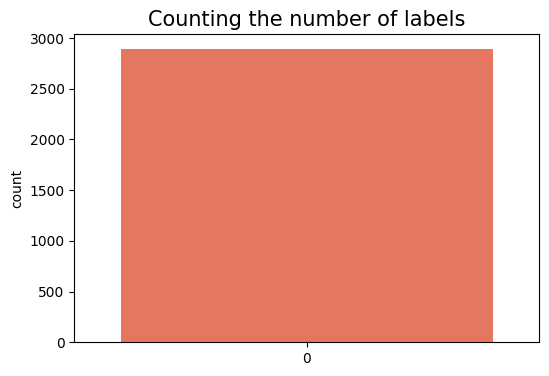

0    2412
1     481
Name: label, dtype: int64


In [23]:
#Graphical Visualisation for counting number of labels.
plt.figure(figsize=(6,4))
sns.countplot(df['label'],palette= 'Reds')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.label.value_counts())

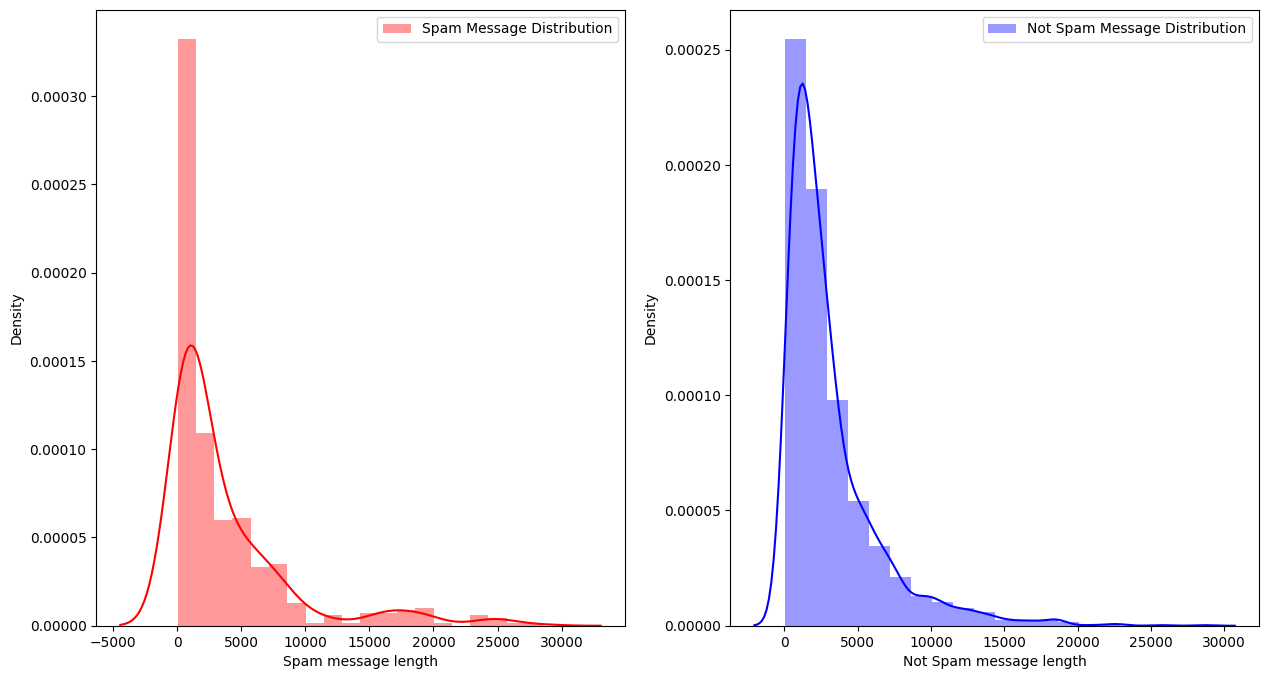

In [24]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

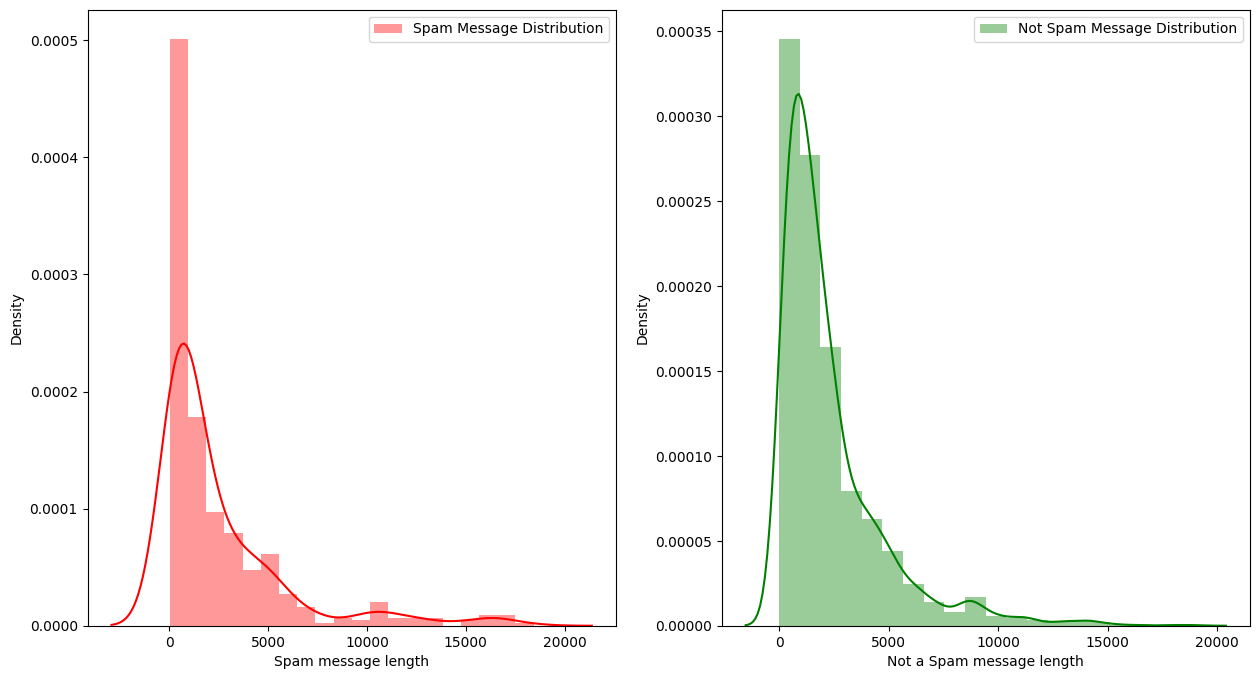

In [25]:
#Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

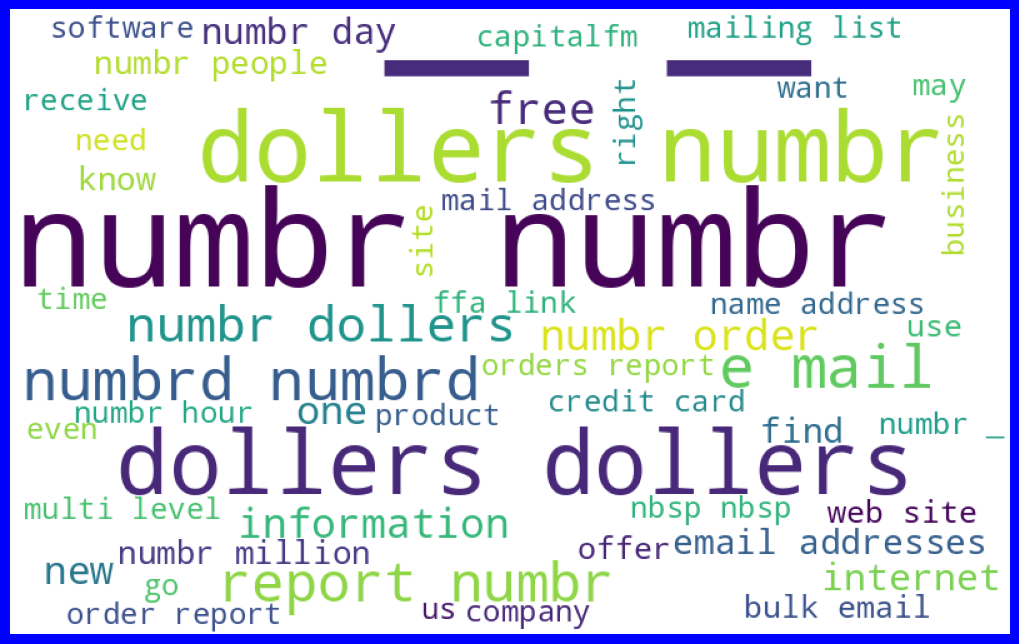

In [26]:
#Getting sense of loud words in spam
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

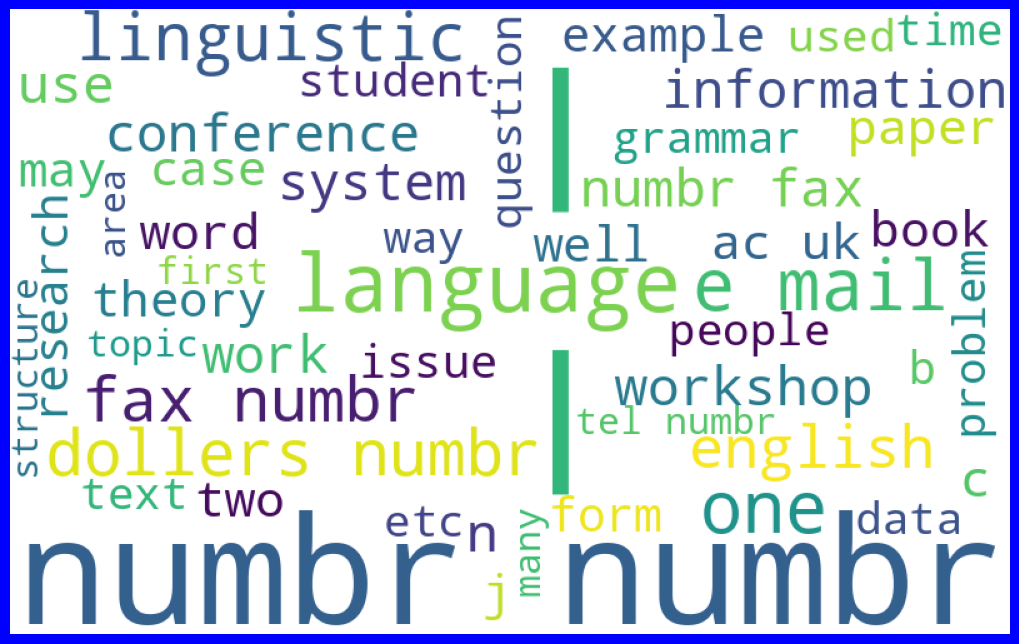

In [27]:
#Getting sense of loud words in not-spam
from wordcloud import WordCloud

not_spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
# Converting the text into vectors using TF-IDF, as text cannot be the input in the model
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label


tf_vec = TfidfVectorizer()

naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

decision = DecisionTreeClassifier()
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")

clf = LogisticRegression()


features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [29]:
# Train and predict for naive bayes model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

#test_size=0.20 random_state=42 test_size=0.15

naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)



print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


In [30]:
# Train and predict for SVM model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

#test_size=0.20 random_state=42 test_size=0.15



SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9875690607734806


In [31]:
# train and predict for the Decision tree model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
decision.fit(X_train,Y_train)
#test_size=0.20 random_state=42 test_size=0.15

y_pred = decision.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))



Final score = >  0.9599447513812155


In [32]:
# train and predict uisng random forest classifier
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
classifier.fit(X_train, Y_train)
#test_size=0.20 random_state=42 test_size=0.15
y_pred= classifier.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9613259668508287


In [33]:
# train and predict uisng logistic regression
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
clf.fit(X_train, Y_train)
#test_size=0.20 random_state=42 test_size=0.15
y_pred= clf.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))


Final score = >  0.9475138121546961


In [34]:
# train and predict uisng KNN
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9758203799654577


In [35]:
# train and predict uisng Neural Network
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model and fit it to the training data
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nn.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9948186528497409


In [36]:
# train and predict uisng Gradient Boosting Algorithm
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create gradient boosting model and fit it to the training data
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9740932642487047


In [37]:
# train and predict uisng Gaussian Naive Bayes model
# Convert sparse matrix X to dense numpy array
X_dense = X.toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes model and fit it to the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9430051813471503


In [38]:
# train and predict uisng CNN(convolutional neural network)

# Convert sparse matrix X to dense numpy array
X_dense = X.toarray()

# Reshape X_dense for use in 1D Convolutional Neural Network
X_reshaped = np.expand_dims(X_dense, axis=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the testing data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/10
73/73 [==============================] - 91s 1s/step - loss: 0.3975 - accuracy: 0.8392
Epoch 2/10
73/73 [==============================] - 83s 1s/step - loss: 0.1829 - accuracy: 0.9352
Epoch 3/10
73/73 [==============================] - 81s 1s/step - loss: 0.0739 - accuracy: 0.9870
Epoch 4/10
73/73 [==============================] - 81s 1s/step - loss: 0.0355 - accuracy: 0.9974
Epoch 5/10
73/73 [==============================] - 79s 1s/step - loss: 0.0200 - accuracy: 0.9987
Epoch 6/10
73/73 [==============================] - 80s 1s/step - loss: 0.0119 - accuracy: 0.9996
Epoch 7/10
73/73 [==============================] - 81s 1s/step - loss: 0.0078 - accuracy: 1.0000
Epoch 8/10
73/73 [==============================] - 90s 1s/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/10
73/73 [==============================] - 80s 1s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 10/10
19/19 [==============================] - 8s 390ms/step
Accuracy: 0.8013816925734024


In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[Text(0.8510174418604651, 0.9821428571428571, 'x[18089] <= 0.015\ngini = 0.266\nsamples = 2169\nvalue = [1827, 342]'),
 Text(0.7640503875968992, 0.9464285714285714, 'x[41154] <= 0.009\ngini = 0.157\nsamples = 1901\nvalue = [1738, 163]'),
 Text(0.6986434108527132, 0.9107142857142857, 'x[32052] <= 0.076\ngini = 0.12\nsamples = 1853\nvalue = [1734, 119]'),
 Text(0.6453488372093024, 0.875, 'x[8614] <= 0.053\ngini = 0.1\nsamples = 1828\nvalue = [1732, 96]'),
 Text(0.5852713178294574, 0.8392857142857143, 'x[19527] <= 0.068\ngini = 0.08\nsamples = 1804\nvalue = [1729, 75]'),
 Text(0.5426356589147286, 0.8035714285714286, 'x[23195] <= 0.019\ngini = 0.065\nsamples = 1780\nvalue = [1720, 60]'),
 Text(0.5038759689922481, 0.7678571428571429, 'x[49044] <= 0.029\ngini = 0.057\nsamples = 1771\nvalue = [1719, 52]'),
 Text(0.4728682170542636, 0.7321428571428571, 'x[51790] <= 0.083\ngini = 0.049\nsamples = 1760\nvalue = [1716, 44]'),
 Text(0.4573643410852713, 0.6964285714285714, 'x[7268] <= 0.044\ngini =

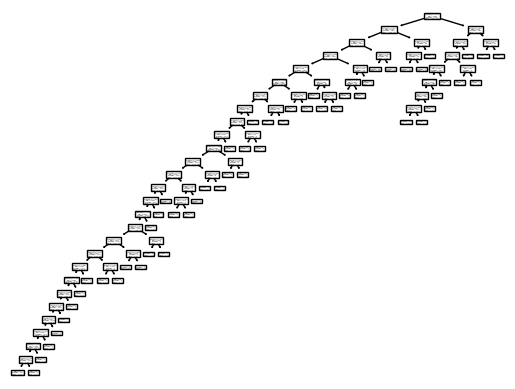

In [40]:
tree.plot_tree(decision)

In [41]:
# Checking Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       464
           1       0.00      0.00      0.00       115

    accuracy                           0.80       579
   macro avg       0.40      0.50      0.44       579
weighted avg       0.64      0.80      0.71       579



In [42]:
from sklearn.metrics import confusion_matrix


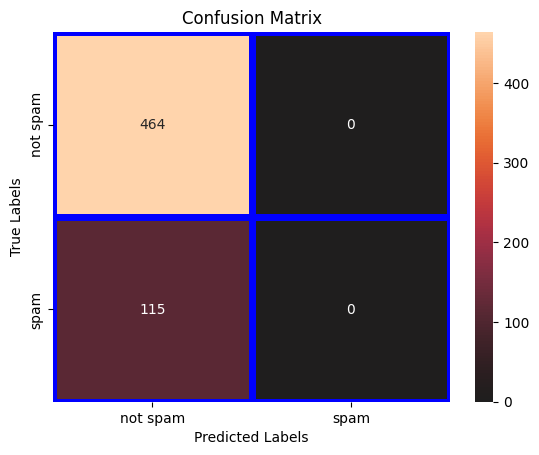

In [43]:
conf_mat = confusion_matrix(y_test,y_pred)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True, ax=ax, linewidths=5, linecolor='b', center=0, fmt='g')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])

plt.show()


<Axes: xlabel='log(HR) (95% CI)'>

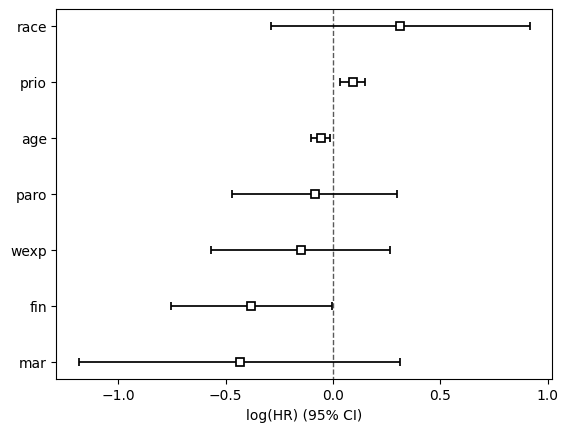

In [44]:
# COX Curve
# Importing necessary libraries
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

# Loading the dataset
rossi_dataset = load_rossi()

# Creating a Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

# Creating a Cox proportional hazards curve
cph.plot()


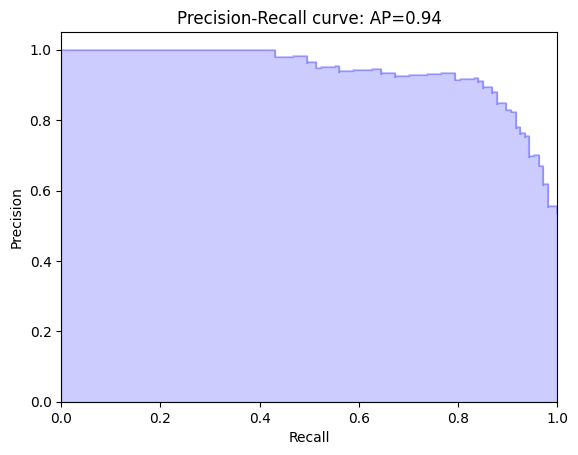

In [45]:


# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Use the model to make predictions on the testing set
y_pred = model.predict_proba(X_test)[:, 1]
y_true = y_test


#pr curve

# Assume y_true and y_pred are the true labels and predicted probabilities, respectively
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
average_precision = average_precision_score(y_true, y_pred)

# Plot the PR curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

# Add labels and a legend to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()
